In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,Conv1DTranspose
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM, Bidirectional,ConvLSTM1D
from keras.layers import TimeDistributed,GaussianNoise,Normalization
from keras.layers import RepeatVector
from keras.layers import Input
# from attention import Attention 

from keras.layers import BatchNormalization
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
import numpy as np
from numpy import genfromtxt
from keras.constraints import max_norm
import cv2
from sklearn.model_selection import train_test_split
from scipy.integrate import odeint
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline
from tensorflow import keras
from tensorflow.keras import layers

# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [29]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline
#import minmaxscaler
from sklearn.preprocessing import MinMaxScaler


#shuffler
def unison_shuffled_copies(a, b,c):
    p = np.random.permutation(len(a))
    return a[p], b[p],c[p]
    
X_Dat=[]


data_size=573
num_parameters=9


for i in range(data_size): 
  daty = genfromtxt("D:\Research_work\My_covid_research2\dataset_preprocessing\parameter_estim\input\states_ "+str(i+1)+" .csv", delimiter=',')
  
  days=daty[:,0]
  S=daty[:,1]
  I=daty[:,2]
  Q=daty[:,3]
  R=daty[:,4]
  D=daty[:,5]



  sampling_fact=30;  # defining factor
  days_n=np.linspace(0,days[len(days)-1],len(days)*sampling_fact)

  c_S = CubicSpline(days,S)
  cubic_S=c_S(days_n)

  c_I = CubicSpline(days,I)
  cubic_I=c_I(days_n)

  c_Q = CubicSpline(days,Q)
  cubic_Q=c_Q(days_n)

  c_R = CubicSpline(days,D)
  cubic_R=c_R(days_n)

  c_D = CubicSpline(days,D)
  cubic_D=c_D(days_n)


  cubic_S=cubic_S[0:81]
  cubic_I=cubic_I[0:81]
  cubic_Q=cubic_Q[0:81]
  cubic_R=cubic_R[0:81]
  cubic_D=cubic_D[0:81]


  

  # temp_dat=np.vstack((cubic_S,cubic_I,cubic_Q,cubic_R,cubic_D))
  # # temp_dat=temp_dat.T
  # if i==0:
  #   temp_dat=scaler.fit_transform(temp_dat)

  # else:
  #   temp_dat=scaler.transform(temp_dat)

  # # temp_dat=temp_dat.T 


  # cubic_S=temp_dat[0,0:81]
  # cubic_I=temp_dat[1,0:81]
  # cubic_Q=temp_dat[2,0:81]
  # cubic_R=temp_dat[3,0:81]
  # cubic_D=temp_dat[4,0:81]


  nc=1
  S = np.reshape(cubic_S, (-1, 9))
  pca = PCA(n_components=nc)
  S_new= pca.fit_transform(S).flatten()
  S_new=np.expand_dims(S_new, axis=0)

  I = np.reshape(cubic_I, (-1, 9))
  pca = PCA(n_components=nc)
  I_new= pca.fit_transform(I).flatten()
  I_new=np.expand_dims(I_new, axis=0)
  
  Q= np.reshape(cubic_Q, (-1, 9))
  pca = PCA(n_components=nc)
  Q_new= pca.fit_transform(Q).flatten()
  Q_new=np.expand_dims(Q_new, axis=0)

  R= np.reshape(cubic_R, (-1, 9))
  pca = PCA(n_components=nc)
  R_new= pca.fit_transform(R).flatten() 
  R_new=np.expand_dims(R_new, axis=0)

  D= np.reshape(cubic_D, (-1, 9))
  pca = PCA(n_components=nc)
  D_new= pca.fit_transform(D).flatten() 
  D_new=np.expand_dims(D_new, axis=0)

  #Also consider using the Hankel matrix
  #Also consider enlongate the vector two to three pc's


  
  # daty_pca= pca.fit_transform(daty[:,1:6]) 
  # pca = PCA(n_components=2)
  # daty_pca= pca.fit_transform(daty[:,1:6]) 
#----------------------------------------------------------------------------------------------------------------------
  # my_dat=np.concatenate((S_new,I_new,Q_new,R_new,D_new),axis=0)
  # my_dat=np.transpose(my_dat)
#----------------------------------------------------------------------------------------------------------------------

  my_dat=np.concatenate((np.transpose(S_new),np.transpose(I_new),np.transpose(Q_new),np.transpose(R_new),np.transpose(D_new)),axis=1)
#----------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------
  #Dimensions should be time x channels
  X_Dat.append(my_dat)

X_datnew=np.asarray(X_Dat)

X=X_datnew

##################################################################################


Y=np.zeros((data_size,num_parameters))

for i in range(data_size):
  my_data = genfromtxt("D:\Research_work\My_covid_research2\dataset_preprocessing\sub_dataset_gen\output_sg_interpolated\parameters_ "+str(i+1)+" .csv", delimiter=',')
  my_data_down=my_data[0:my_data.size:3]
  Y[i,:]=my_data_down[0:num_parameters]
  


Z=np.zeros((data_size,num_parameters))

for i in range(data_size):
  my_data = genfromtxt("D:\Research_work\My_covid_research2\dataset_preprocessing\parameter_estim\output\parameters_ "+str(i+1)+" .csv", delimiter=',')
  # my_data_down=my_data[0:my_data.size:3]
  Z[i,:]=my_data[0:num_parameters]
    
###################################################################################




X,Y,Z=unison_shuffled_copies(X,Y,Z)

# Split the dataset
split_train = int(len(X)*0.8)
split_valid = int(len(X)*0.99)

# Train
X_train = X[:split_train, :]; y_train=Y[:split_train, :];z_train=Z[:split_train, :]

# Valid
X_valid = X[split_train:split_valid,:]; y_valid=Y[split_train:split_valid,:];z_valid=Z[split_train:split_valid,:]

# Test
X_test = X[split_valid:,:]; y_test=Y[split_valid:,:];z_test=Z[split_valid:,:]

scaler=MinMaxScaler()
z_train=scaler.fit_transform(z_train)
z_valid=scaler.transform(z_valid)



print(X_train.shape, y_train.shape,z_train.shape)
print(X_valid.shape, y_valid.shape,z_valid.shape)
print(X_test.shape, y_test.shape,z_test.shape)


(458, 9, 5) (458, 9) (458, 9)
(109, 9, 5) (109, 9) (109, 9)
(6, 9, 5) (6, 9) (6, 9)


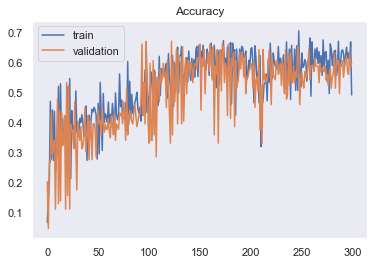

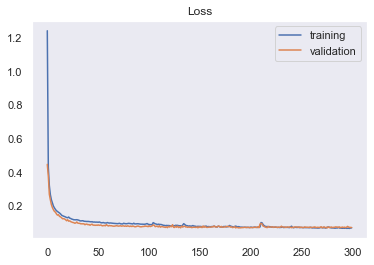

In [30]:

from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.regularizers import l2
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import * 
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K

# from kerashypetune import KerasGridSearch

import math

out_dim=num_parameters
input_shape = X_train.shape[1:]
activators=['linear','elu','selu','softplus','swish','softsign','relu','tanh','linear']





conv1d_first_layer_filters=120
conv1d_second_layer_filters=65
conv1d_third_layer_filters=32

conv1d_first_layer_kernel=1
conv1d_second_layer_kernel=1
conv1d_third_layer_kernel=1

strider=1

act_conv1d_first_layer='linear'

seond_last_dense_num=200
act_second_last_dense='selu'
dropouter=0.7
encoder_dropouter=0.0625

num_blocker=1



### DEFINE T2V LAYER ###

class Time2Vec(keras.layers.Layer):
    def __init__(self, kernel_size=1):
        super(Time2Vec, self).__init__(trainable=True, name='Time2VecLayer')
        self.k = kernel_size
    
    def build(self, input_shape):
        # trend
        self.wb = self.add_weight(name='wb',shape=(input_shape[1],),initializer='uniform',trainable=True)
        self.bb = self.add_weight(name='bb',shape=(input_shape[1],),initializer='uniform',trainable=True)
        # periodic
        self.wa = self.add_weight(name='wa',shape=(1, input_shape[1], self.k),initializer='uniform',trainable=True)
        self.ba = self.add_weight(name='ba',shape=(1, input_shape[1], self.k),initializer='uniform',trainable=True)
        super(Time2Vec, self).build(input_shape)
    
    def call(self, inputs, **kwargs):
        bias = self.wb * inputs + self.bb
        dp = K.dot(inputs, self.wa) + self.ba
        wgts = K.sin(dp) # or K.cos(.)

        ret = K.concatenate([K.expand_dims(bias, -1), wgts], -1)
        ret = K.reshape(ret, (-1, inputs.shape[1]*(self.k+1)))
        return ret
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*(self.k + 1))



def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    # x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    x = inputs
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    x = x+inputs
    # x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Feed Forward Part
    # x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu")(x)
    # x=  layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = x+inputs
    res = layers.LayerNormalization(epsilon=1e-6)(x)
    return res



def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    dropout,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    # time_embedding=TimeDistributed(Time2Vec(kernel_size=1))(x)
    # x = K.concatenate([inputs, time_embedding], -1)

    # x=BatchNormalization()(x)
    # for _ in range(num_transformer_blocks):
    #     x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    #     x=BatchNormalization()(x)
        # x=layers.Bidirectional(LSTM(10, return_sequences=True))(x)

    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)   
    # x=BatchNormalization()(x)
    # x = layers.Dropout(mlp_dropout)(x)
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)   
    # x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)  
    # x=BatchNormalization()(x)
    # x=layers.Bidirectional(LSTM(10, return_sequences=True))(x)
    # x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    x=layers.Flatten()(x)
    # x = layers.Dense(mlp_units, activation=act_second_last_dense)(x)
    # x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(out_dim, activation="linear")(x)
    return keras.Model(inputs, outputs)



seq = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    dropout=0.0,
)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=300,
    decay_rate=0.8)




seq.compile(loss='mse', optimizer=Adam(learning_rate=lr_schedule), metrics=['accuracy'])

history=seq.fit(X_train, y_train, batch_size=64,verbose=0, epochs=300, validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.figure()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss= history.history['loss']
val_loss= history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc,label='train')
plt.plot(epochs, val_acc,label='validation')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss,label='training')
plt.plot(epochs, val_loss,label='validation')
plt.title('Loss')
plt.grid()
plt.legend()


In [31]:
from sklearn.metrics import mean_absolute_error
# z_predict=seq.predict(X_test)
# z_predict=scaler.inverse_transform(z_predict)
# print("Mean Absolute Error:",mean_absolute_error(z_test, z_predict))
# print("max of parameters:",np.max(z_test))


y_predict=seq.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test, y_predict))
print("max of parameters:",np.max(y_test))

Mean Absolute Error: 0.1260215701270901
max of parameters: 0.951948671539793


Text(0.5, 1.0, 'MAE= 0.09498146128019942')

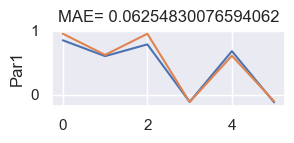

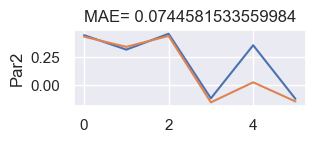

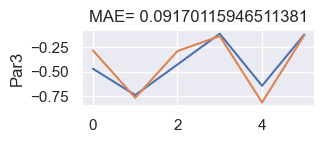

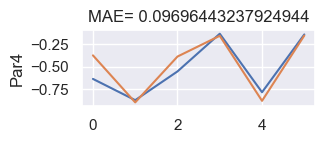

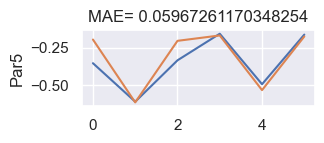

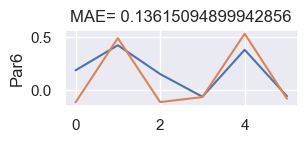

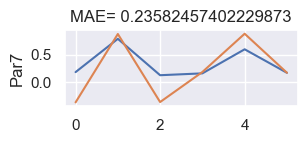

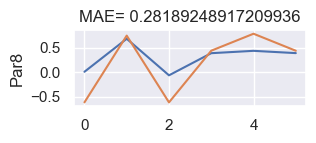

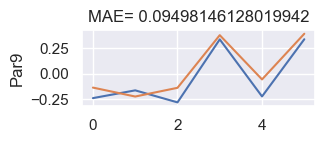

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(3, 1), dpi=100)


z_predict=y_predict
z_test=y_test



plt.plot(z_predict[:,0],label="Predicted Amplitudes")
plt.plot(z_test[:,0],label="Reference Amplitudes")
plt.ylabel("Par1")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,0], z_test[:,0])))


figure(figsize=(3, 1), dpi=100)


plt.plot(z_predict[:,1],label="Predicted Amplitudes")
plt.plot(z_test[:,1],label="Reference Amplitudes")
plt.ylabel("Par2")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,1], z_test[:,1])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,2],label="Predicted Amplitudes")
plt.plot(z_test[:,2],label="Reference Amplitudes")
plt.ylabel("Par3")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,2], z_test[:,2])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,3],label="Predicted Amplitudes")
plt.plot(z_test[:,3],label="Reference Amplitudes")
plt.ylabel("Par4")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,3], z_test[:,3])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,4],label="Predicted Amplitudes")
plt.plot(z_test[:,4],label="Reference Amplitudes")
plt.ylabel("Par5")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,4], z_test[:,4])))

figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,5],label="Predicted Amplitudes")
plt.plot(z_test[:,5],label="Reference Amplitudes")
plt.ylabel("Par6")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,5], z_test[:,5])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,6],label="Predicted Amplitudes")
plt.plot(z_test[:,6],label="Reference Amplitudes")
plt.ylabel("Par7")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,6], z_test[:,6])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,7],label="Predicted Amplitudes")
plt.plot(z_test[:,7],label="Reference Amplitudes")
plt.ylabel("Par8")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,7], z_test[:,7])))


figure(figsize=(3, 1), dpi=100)



plt.plot(z_predict[:,8],label="Predicted Amplitudes")
plt.plot(z_test[:,8],label="Reference Amplitudes")
plt.ylabel("Par9")
plt.title('MAE= '+str(mean_absolute_error(z_predict[:,8], z_test[:,8])))





In [33]:
seq.save('approximator9.h5')